<a href="https://colab.research.google.com/github/Raufjatoi/collab-notebooks/blob/main/faceSwappin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install insightface


In [7]:
!pip install onnxruntime


import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis

#from insightface.data import ins_get_image

# Specify the path to your image file
#image_path = "path/to/your/image.jpg"

# Load the image using ins_get_image function
#image = ins_get_image(image_path)

# Now you have the image loaded and ready for further processing



In [9]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:05<00:00, 47971.41KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


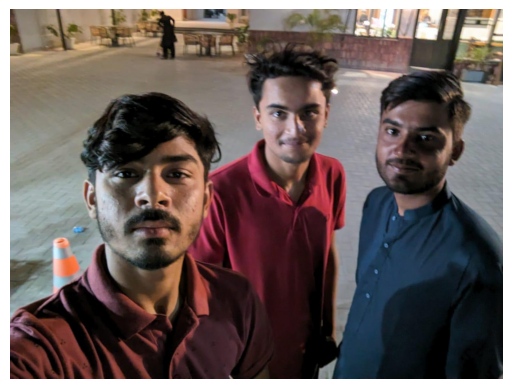

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image = cv2.imread("/content/87fa8fa7-ba82-41ec-8a12-8e5894f4f63f.jpg")

# OpenCV loads images in BGR format, so we need to convert it to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis
plt.show()

In [13]:
faces =app.get(image)

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [14]:
faces

[{'bbox': array([ 949.4733 ,  233.50722, 1148.0247 ,  472.72302], dtype=float32),
  'kps': array([[ 993.6753 ,  315.33597],
         [1078.992  ,  333.8227 ],
         [1015.47833,  372.65564],
         [ 980.8512 ,  395.70636],
         [1059.5614 ,  413.3349 ]], dtype=float32),
  'det_score': 0.8805952,
  'landmark_3d_68': array([[ 9.65684143e+02,  2.98580017e+02,  1.58489792e+02],
         [ 9.63825317e+02,  3.26222168e+02,  1.57870453e+02],
         [ 9.61962830e+02,  3.54730072e+02,  1.54946808e+02],
         [ 9.60048096e+02,  3.82414734e+02,  1.46119354e+02],
         [ 9.59123901e+02,  4.08629913e+02,  1.24435173e+02],
         [ 9.65734924e+02,  4.28868408e+02,  1.04360481e+02],
         [ 9.74615540e+02,  4.44737823e+02,  8.63713760e+01],
         [ 9.84624695e+02,  4.58124023e+02,  6.27127380e+01],
         [ 1.00933295e+03,  4.71660095e+02,  4.47674217e+01],
         [ 1.04318103e+03,  4.70959198e+02,  4.59569244e+01],
         [ 1.07150623e+03,  4.63620209e+02,  6.33818054

In [15]:
len(faces)

3

In [16]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

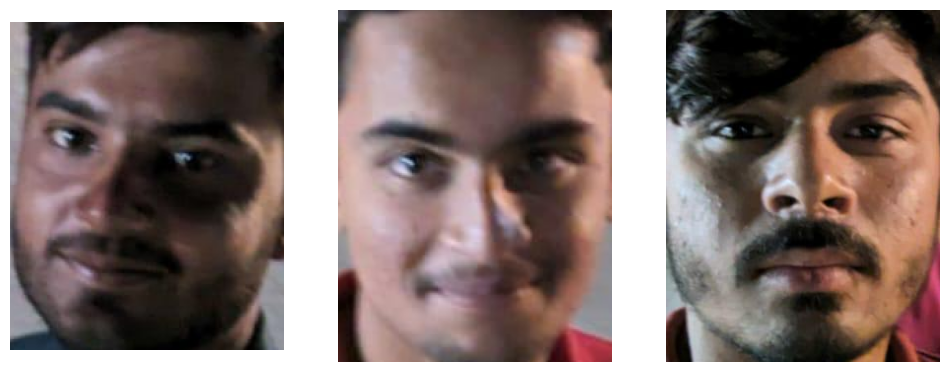

In [20]:
img = image.copy()
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for i , face in enumerate(faces):
  bbox = face['bbox']
  bbox =[int(b) for b in bbox]
  axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
  axs[i].axis('off')


In [44]:
swapper = insightface.model_zoo.get_model('/content/inswapper_128.onnx', download=False, download_zip=False)



/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


InvalidProtobuf: [ONNXRuntimeError] : 7 : INVALID_PROTOBUF : Load model from /content/inswapper_128.onnx failed:Protobuf parsing failed.

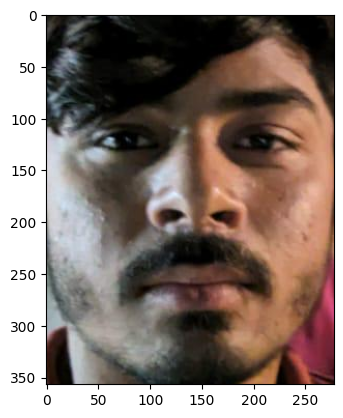

In [28]:
source_face = faces[0]
bbox = face['bbox']
bbox =[int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [33]:


res = image.copy()
for face in faces:
  res = swapper.get(res,face,source_face,paste_back=True)


ModuleNotFoundError: No module named 'face_swapper'